# Aula 01 - Quarentena Dados 🎲

-----
## Print() do Python
Nesta primeira célula estamos realizando um print(), lembre-se que esta função python imprime a string que estamos passando como parâmetro, então o retorno é exibido logo abaixo da célula com código.

In [2]:
print("Bruna Gomes")
print("Eu adoro comer churros!")

Bruna Gomes
Eu adoro comer churros!


## Variavel String
Aqui estamos fazendo uma atribuição de variável, conforme dito em aula, as atribuições não tem retorno, assim, diferente da célula anterior não temos um output logo abaixo do código.

In [3]:
nome_do_filme = 'A viagem de Chihiro'

Agora que criamos a variável nome_do_filme, podemos reutilizá-la, por exemplo na função print, para assim imprimir a string "Totoro, o filme".

In [4]:
print(nome_do_filme)

A viagem de Chihiro


Ou até mesmo chamar a própria variável e ver o conteúdo dentro dela

In [5]:
nome_do_filme

'A viagem de Chihiro'

## Lendo os dados do MovieLens

Vamos importar a biblioteca [pandas](https://pandas.pydata.org/), um poderoso projeto open source para análise de manipulação de dados. O primeiro passo é ler uma base de dados e podemos fazer isso com o comando ``pd.read_csv()``.

Estamos lendo um arquivo CSV (Comma-separated values), neste tipo de arquivo os valores são separados por vírgulas e podem ser abertos em outras ferramentas como excel e google-sheet. CSV não é o único formato lido pelo pandas, temos o ``pd.read_excel()`` que lê arquivos xlsx entre diversos outros formatos, você pode encontrar mais informações na seção de [input/output da documentação](https://pandas.pydata.org/pandas-docs/stable/reference/io.html).

Depois de ler o dataset, nós trocamos os nomes das colunas pelos termos em português, logo em seguida utilizamos o método ``filmes.head()`` para visualizar as primeiras 5 linhas do nosso dataframe. Outra forma de visualizar as informações dos dados é utilizando o método ``filmes.sample()``, se você tentar, vai verificar que ele retorna uma linha aleatória do seus dados. Para escolher aleatoriamente mais de 1 linha, por exemplo 5, é só passar esse valor desejado como parâmetro (``filmes.sample(5)``).

In [7]:
import pandas as pd

In [8]:
# Filmes é um dataframe
filmes = pd.read_csv('https://gist.githubusercontent.com/littlebru/fe6f50293b186a804acb4c0bab0ed9f6/raw/df1a86e0a4c23fd91c811e7c822b0b53ae3b5972/movies.csv')

# Traduzindo as colunas para o Portugues
filmes.columns = ['filmeId', 'titulo', 'genero']

# Mostrando os primeiros 5 valores da tabela
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Lendo a Docstring das funções
Os notebooks facilitam a nossa vida podendo consultar o docstring das funções e métodos, rodando a célula com um ? na frente da chamada, uma view é aberta com as informações resumidas. Veja a seguir alguns exemplos.

In [9]:
# lendo a documentação de um método/atributo

?filmes.head

In [10]:
# lendo a documentação do tipo (docstring)

?filmes

## Lendo as avaliações dos filmes
A base de dados que usamos até o momento contém o nome do filme, ano de lançamento e gêneros. O MovieLens conta com outras informações que estão em bases separadas, uma delas é a de avaliações.

In [12]:
# Lendo as notas (Apenas as 5 primeiras)

avaliacoes = pd.read_csv("https://gist.githubusercontent.com/littlebru/b355db5f15177cab8d9207ed586600f2/raw/a3262f5c8d06a29323582acb2605798479a03aa7/ratings.csv")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Para visualizar algumas linhas estamos usando o ``.head()``, como ela mostra apenas as 5 primeiras linhas não sabemos qual é a quantidade de linhas que temos. 

Para descobrir a "forma" dos nossos dados podemos utilizar o ``avaliacoes.shape``, retornando uma [tupla](https://www.alura.com.br/artigos/conhecendo-as-tuplas-no-python), onde o primeiro termo indica o número de linhas e o segundo o número de colunas.

In [13]:
avaliacoes.shape

(39557, 4)

In [14]:
# Quantidade de linhas na tabela

len(avaliacoes)

39557

### Renomeando colunas
Vamos substituir os nomes das colunas de inglês para português e entender o que são essas colunas.

usarioId => ID para para usuário que votou em determinado filme.

filmeId => ID para identificar um filme votado.

nota => A nota dada para pelo usuário para o respectivo filme.

momento => A data da votação que não está formatada como data

In [15]:
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Como visualizar dados de apenas um filme da tabela
Como cada linha contém um voto para o respectivo filme é de se esperar que um filme tenha diversos votos, mas repare que nas 5 primeiras linhas temos o filme **1, 3, 6, 47, 50**. Mas e se eu quiser analisar apenas as notas do filme 1, como posso separar essa informação?

Uma forma para "separar" as informações apenas do **filmeId 1** é chamando o método ``avaliacaoes.query("filmeId==1")``, esse método retornará apenas as linhas para quais a expressão booleana, *filmeId==1*, for verdadeira.

Tendo as informações do **filmeId 1** podemos chamar o ``avaliacoes_do_filme_1.describe()``, para analisar as estatítiscas gerais dos dados.

In [17]:
# Imprimindo apenas os 5 primeiros

avaliacoes_do_filme_1 = avaliacoes.query("filmeId==1")
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


#### Descrevendo informações detalhadas a respeito do filmeId 1
Podemos chamar o método .describe() para saber informações vinculadas ao filme 1 (``filmeId == 1``).

In [19]:
avaliacoes_do_filme_1.describe()

,usuarioId,filmeId,nota,momento
count,99.000000,99.0,99.000000,9.900000e+01
mean,140.373737,1.0,3.883838,1.107824e+09
std,79.154407,0.0,0.894508,2.330022e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,72.000000,1.0,3.250000,8.680780e+08
50%,144.000000,1.0,4.000000,1.076956e+09
75%,209.500000,1.0,4.500000,1.279136e+09
max,274.000000,1.0,5.000000,1.532458e+09


#### Calculando a média de notas do filmeId 1
Caso queira uma estatística particular, podemos apenas chamar o método desajado, repare abaixo como calculamos apenas a média das avaliações do filmeId 1.

In [21]:
# Calculando a média de notas do filme 01

avaliacoes_do_filme_1.mean()

usuarioId    1.403737e+02
filmeId      1.000000e+00
nota         3.883838e+00
momento      1.107824e+09
dtype: float64

### Imprimindo informações detalhadas da tabela base
Calculamos as estatísicas apenas para o filmeId 1, mas também podemos chamar o método .describe() para a base completa (avaliacões).

In [22]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,39557.000000,39557.000000,39557.000000,3.955700e+04
mean,133.147863,19071.242890,3.579645,1.184724e+09
std,78.724076,36049.318006,1.024547,2.183856e+08
min,1.000000,1.000000,0.500000,1.000000e+00
25%,64.000000,1059.000000,3.000000,9.752120e+08
50%,129.000000,2722.000000,4.000000,1.161621e+09
75%,202.000000,7265.000000,4.000000,1.431954e+09
max,274.000000,193587.000000,5.000000,1.537650e+09


#### Calculando a média de notas em cada filme
Calculamos um tanto de coisa usando ``.describe()`` e ``.mean()``, mas a informação que realmente queremos é a média da nota. Então o ponto é, como calcular a média apenas das notas?

A primeira coisa que precisamos fazer é selecionar apenas as informações de notas. Usando uma estrutura muito parecida com a de **chave-valor** dos [dicionários python](https://www.alura.com.br/artigos/trabalhando-com-o-dicionario-no-python).

Com o comando ``avaliacoes["nota"]``, obtemos os valores da coluna nota (repare que o tipo retornado é uma Série pandas, por isso o index de cada nota é mantido). Para calcular a média de todas as notas executamos ``avaliacoes["notas"].means()``

In [26]:
avaliacoes['nota'].mean()

3.579644563541219

---
Podemos calcular também na nota média do filmeId 1, repare que o resultado é um pouco maior que a geral. Apenas com essa análise não da para bater o martelo que o filme 1 é acima da média, mas apenas com essa análise conseguimos formular uma primeira hipótese!

---

In [25]:
avaliacoes_do_filme_1["nota"].mean()

3.8838383838383836

#### Caculando a média de notas para todos os filmes
Foi calculado uma média geral, uma média para o filmeId 1. 

Agora eu quero calcular a média das notas para todos os filmes, podemos fazer isso usando o método ``.groupby(filmeId)``, o parâmetro passado é para indicar qual coluna ele deve utilizar para "agrupar" os dados.

Depois é só calcular a média como foi feito anteriormente

In [29]:
# Calculando dos 15 primeiros filmes da tabela

notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head(15)

filmeId
1     3.883838
2     3.369048
3     3.520000
4     2.600000
5     3.565217
6     3.906977
7     3.196429
8     3.000000
9     3.000000
10    3.517857
11    3.906250
12    2.214286
13    3.333333
14    4.333333
15    3.750000
Name: nota, dtype: float64

Temos as notas médias calculadas, mas agora eu quero juntar as informações de notas médias com a base de dados **filmes**

Isso poderia ser feito criando uma nota coluna e atribuindo a variável ``notas_medias_por_filmes``, de forma direta, como feito abaixo: 

``filmes["nota_media"] = notas_medias_por_filme``

Porém esta não é uma boa prática, pis precisamos garantir que a nota média seja do respectivo filme.

Para garantir essa condição, vou utilizar o ``.join()``, criando um novo DataFrame

``(filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId"))``

Como nas células seguintes:

In [32]:
# Imprimindo a tabela de filmes
filmes

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [34]:
# Imprimindo as notas médias por filme (15 primeiras)

notas_medias_por_filme.head(15)

filmeId
1     3.883838
2     3.369048
3     3.520000
4     2.600000
5     3.565217
6     3.906977
7     3.196429
8     3.000000
9     3.000000
10    3.517857
11    3.906250
12    2.214286
13    3.333333
14    4.333333
15    3.750000
Name: nota, dtype: float64

In [35]:
# Agrupando informações das notas médias por filme com a tabela de filmes

filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.883838
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.369048
2,3,Grumpier Old Men (1995),Comedy|Romance,3.520000
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.600000
4,5,Father of the Bride Part II (1995),Comedy,3.565217


#### Visualizando o Dataframe , em ordem decrescente


In [36]:
# Imprimindo apenas os 15 primeiros itens do dataframe

filmes_com_media.sort_values("nota", ascending=False).head(15)

,filmeId,titulo,genero,nota
1309,1755,Shooting Fish (1997),Comedy|Romance,5.0
6265,47382,Step Up (2006),Drama|Romance,5.0
6283,47736,"Chump at Oxford, A (1940)",Comedy,5.0
8404,110501,The Raid 2: Berandal (2014),Action|Crime|Thriller,5.0
6307,48322,Jackass Number Two (2006),Comedy|Documentary,5.0
3974,5607,"Son of the Bride (Hijo de la novia, El) (2001)",Comedy|Drama,5.0
8385,109846,Mr. Peabody & Sherman (2014),Adventure|Animation|Comedy,5.0
9281,157775,Tenchi Muyô! In Love (1996),Animation|Comedy,5.0
8381,109633,"Garden of Words, The (Koto no ha no niwa) (2013)",Animation|Romance,5.0
1228,1631,"Assignment, The (1997)",Action|Thriller,5.0


## Gerando gráficos dos dados
Fizemos um tanto de análise e manipulação de dados interessante, não é?

Mas diz a verdade, você está sentindo falta daquele gráfico que todo cientista de dados adora 😏, então bora plotar nosso primeiro gráfico!

O pandas facilita muito o plot de alguns gráficos simples, apenas selecionamos a informação que gostaríamos de visualizar e chamamos o método .plot()

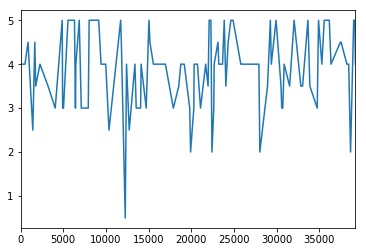

In [39]:
avaliacoes.query("filmeId == 1")["nota"].plot()

### Melhorando a visualização
Por padrão o método plotou um gráfico de linhas, o que não é adequado para os dados que estamos analisando.

Precisamos mudar o tipo de gráfico para realizar uma análise mais adequada, para fazer isso apenas alteramos o parâmetro kind do método ``.plot``. Vamos plotar um [histograma](https://pt.wikipedia.org/wiki/Histograma) rodando a célula a seguir.

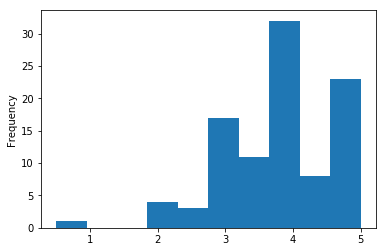

In [42]:
#Imprimindo no formato de histograma

avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')

#### Adicionando titulo ao gráfico
Legal, agora temos uma visualização muito mais agradavel de analisar. Compare com o gráfico de linhas, qual você acha melhor para análise?

P.S: Deixar de usar o gráfico de linhas, não significa que sejá uma visualização ruim. Apenas quer dizer que nossos dados não tem características ideias para serem visualizados como um line plot, agora pense em uma série temporal. Você acha que o gráfico de linhas ainda seria uma má ideia?

Antes de analisar o histograms de outros filmes, quero colocar um título na imagem. Vamos ver como podemos fazer isso!

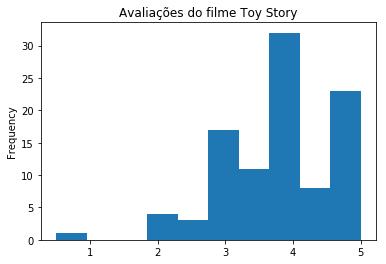

In [47]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist',
                                              title="Avaliações do filme Toy Story")

## Experimentando funções do Matplotlib
Python possui outras ferramentas para manipulação de gráficos, uma delas é o **Matplotlib**.

Vamos experimentar algumas funcionalidades deta biblioteca

Vamos começar importando a biblioteca e adicionar o titulo no gráfico utilizando o matplotlib, veja abaixo:

In [53]:
import matplotlib.pyplot as plt

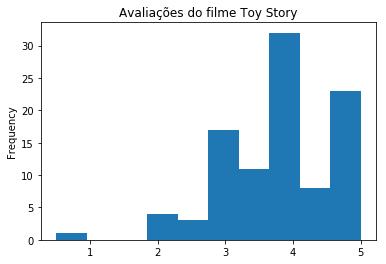

In [57]:
# Imprimindo o gráfico utilizando o matplotlib

avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

#### Plotando gráficos de outros filmes
Aprendemos a criar um histograma e manipular os gráficos, agora podemos mostrar informações de notas de outros filmes além do filme *Toy Story*.

Vamos plotar o histograma do filme *Jumanji* e da animação *Mr. Peabody & Sherman*.

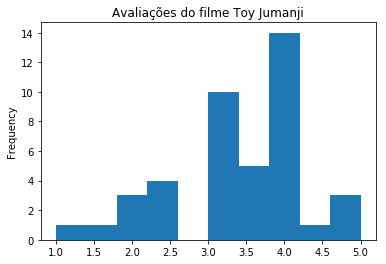

In [59]:
# Plotando gráfico das notas do filme Jumanji
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist')

plt.title("Avaliações do filme Toy Jumanji")
plt.show()

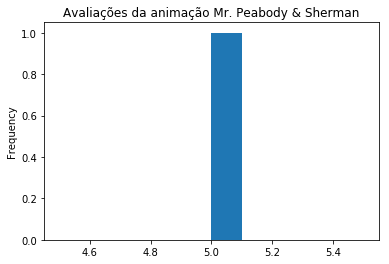

In [62]:
# Plotando gráfico das notas da animação Mr. Peabody & Sherman
avaliacoes.query("filmeId == 109846")["nota"].plot(kind='hist')

plt.title("Avaliações da animação Mr. Peabody & Sherman")
plt.show()